# Лабораторная работа 1

# Исследование набора данных наземных мин Илмаза

## Подключение библиотеки NumPy и загрузка данных

In [1]:
import numpy as np
data_path = "mine-dataset.data.csv"
data = np.genfromtxt(data_path, delimiter=',')
print(data)

[[0.33815676 0.         0.                nan]
 [0.32024133 0.18181818 0.                nan]
 [0.28700875 0.27272727 0.                nan]
 ...
 [0.35347392 0.45454545 1.                nan]
 [0.36253735 0.72727273 1.                nan]
 [0.31419905 1.         1.                nan]]


## Тип переменной и форма (shape)

In [2]:
print(f"Data type: {type(data)}")
print(f"Data shape: {data.shape}")
print(data[-4:])

Data type: <class 'numpy.ndarray'>
Data shape: (338, 4)
[[0.44410824 0.18181818 1.                nan]
 [0.35347392 0.45454545 1.                nan]
 [0.36253735 0.72727273 1.                nan]
 [0.31419905 1.         1.                nan]]


## Получение типа набора данных, строки, элемента

Датасет содержит выборку данных о том, при каких условиях были найдены те или иные типы мин:
- нет мины (NULL)
- противотанковая (ANTI-TANK)
- противопехотная (ANTI-PERSONELL)
- мина-ловушка (BOOBY TRAPPED)
- мина M14 (M14)

Соответственно даны 3 параметра нахождения мины:
- вольтаж сенсора (1 столбец)
- высота сенсора над землей (2 столбец)
- тип почвы (3 столбец)

С помощью данного набора можно построить модель обучения, позволяющую облегчать разминирование больших участков территории

In [3]:
data1 = np.genfromtxt(data_path, delimiter=',', dtype=None)
print(f"Shape of the dataset: {data1.shape}")
print(f"Datasset type: {type(data1)}")
print(f"A single row of the dataset is type of: {type(data1[0])}")
row_elem_types = {type(i) for i in data1[0]}
print(f"Types of elements: {' '.join([str(i) for i in row_elem_types])}")
vmax, hmax, smax, _ = data.max(axis=0)
vmin, hmin, smin, _ = data.min(axis=0)
vavg, havg, savg, _ = data.mean(axis=0)
print(f"Voltage range: {vmin} - {vmax} (avg. {vavg});\nHigh range: {hmin} - {hmax} (avg. {havg});\nSoil type range: {smin} - {smax} (avg. {savg})")
print(f"Dataset:\n{data1}")

Shape of the dataset: (338,)
Datasset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.void'>
Types of elements: <class 'numpy.str_'> <class 'numpy.float64'>
Voltage range: 0.1977338788 - 0.9999987276 (avg. 0.4306342659461536);
High range: 0.0 - 1.0 (avg. 0.5088757396460654);
Soil type range: 0.0 - 1.0 (avg. 0.5035502958579883)
Dataset:
[(0.33815676, 0.        , 0. , 'NULL')
 (0.32024133, 0.18181818, 0. , 'NULL')
 (0.28700875, 0.27272727, 0. , 'NULL')
 (0.25628362, 0.45454545, 0. , 'NULL')
 (0.2628396 , 0.54545455, 0. , 'NULL')
 (0.24096646, 0.72727273, 0. , 'NULL')
 (0.25441049, 0.81818182, 0. , 'NULL')
 (0.23492417, 1.        , 0. , 'NULL')
 (0.35347392, 0.        , 0.6, 'NULL')
 (0.33534705, 0.18181818, 0.6, 'NULL')
 (0.33534705, 0.27272727, 0.6, 'NULL')
 (0.33002989, 0.45454545, 0.6, 'NULL')
 (0.33534705, 0.54545455, 0.6, 'NULL')
 (0.30513561, 0.72727273, 0.6, 'NULL')
 (0.25628362, 0.81818182, 0.6, 'NULL')
 (0.2356493 , 1.        , 0.6, 'NULL')
 (

## Указание типа столбцов при загрузке данных

In [4]:
dt = np.dtype('f8, f8, f8, U30')
data2 = np.genfromtxt(data_path, delimiter=',', dtype=dt)
print(f"Shape of the dataset: {data2.shape}")
print(f"Dataset type: {type(data2)}")
print(f"A single row of the dataset is type of: {type(data2[0])}")
row_elem_types = {type(i) for i in data2[0]}
print(f"Types of elements: {' '.join([str(i) for i in row_elem_types])}")
print(F"Dataset slice:\n{data2[:10]}")

Shape of the dataset: (338,)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.void'>
Types of elements: <class 'numpy.str_'> <class 'numpy.float64'>
Dataset slice:
[(0.33815676, 0.        , 0. , 'NULL')
 (0.32024133, 0.18181818, 0. , 'NULL')
 (0.28700875, 0.27272727, 0. , 'NULL')
 (0.25628362, 0.45454545, 0. , 'NULL')
 (0.2628396 , 0.54545455, 0. , 'NULL')
 (0.24096646, 0.72727273, 0. , 'NULL')
 (0.25441049, 0.81818182, 0. , 'NULL')
 (0.23492417, 1.        , 0. , 'NULL')
 (0.35347392, 0.        , 0.6, 'NULL')
 (0.33534705, 0.18181818, 0.6, 'NULL')]


## Построение графиков с использованием Matplotlib

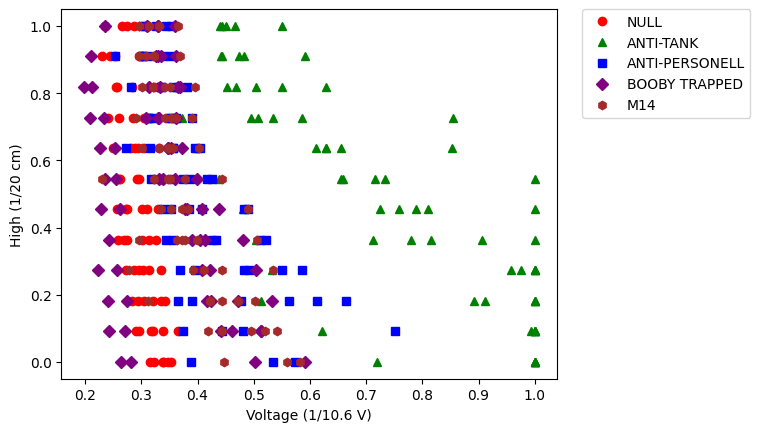

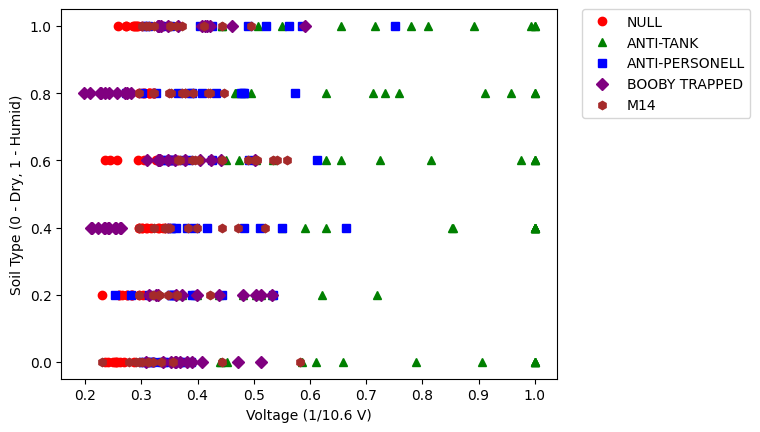

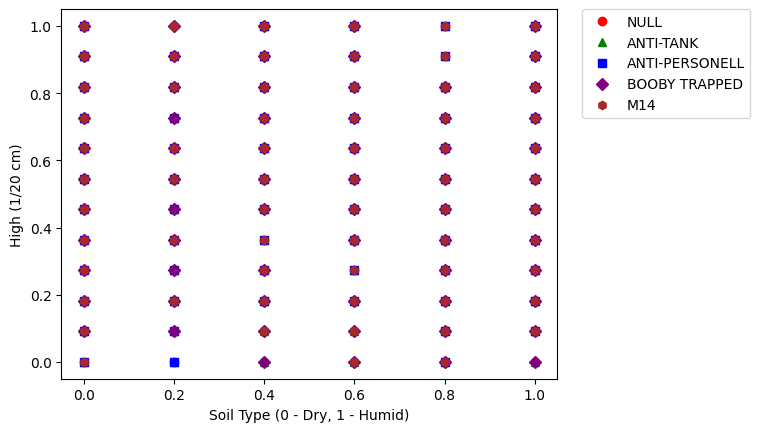

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Данные по каждому столбцу
voltages = {}  # output voltage of FLC sensor
highs = {}  # height of sensor from the ground 
soil_types = {}  # 0 to 1, 6 different types by 0.2 step

# Выполняем обход всей коллекции data2
for (v, h, s, t) in data2:
    if t in voltages.keys():
        voltages[t].append(v)
    else:
        voltages[t] = [v]
    if t in highs.keys():
        highs[t].append(h)
    else:
        highs[t] = [h]
    if t in soil_types.keys():
        soil_types[t].append(s)
    else:
        soil_types[t] = [s]

# Строим графики по проекциям данных
# Учитываем, что все типы находятся в массивах по соответствующим ключам:
# NULL, ANTI-TANK, ANTI-PERSONELL, BOOBY TRAPPED, M14
plt.figure(1)
null, = plt.plot(voltages['NULL'], highs['NULL'], 'ro', label='NULL')
anti_tank = plt.plot(voltages['ANTI-TANK'], highs['ANTI-TANK'], 'g^', label='ANTI-TANK')
anti_personell = plt.plot(voltages['ANTI-PERSONELL'], highs['ANTI-PERSONELL'], 'bs', label='ANTI-PERSONELL')
booby_trapped = plt.plot(voltages['BOOBY TRAPPED'], highs['BOOBY TRAPPED'], color='purple', marker='D', linestyle='', label='BOOBY TRAPPED')
m14 = plt.plot(voltages['M14'], highs['M14'], color='brown', marker='h', linestyle='', label='M14')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Voltage (1/10.6 V)')
plt.ylabel('High (1/20 cm)')

plt.figure(2)
null, = plt.plot(voltages['NULL'], soil_types['NULL'], 'ro', label='NULL')
anti_tank = plt.plot(voltages['ANTI-TANK'], soil_types['ANTI-TANK'], 'g^', label='ANTI-TANK')
anti_personell = plt.plot(voltages['ANTI-PERSONELL'], soil_types['ANTI-PERSONELL'], 'bs', label='ANTI-PERSONELL')
booby_trapped = plt.plot(voltages['BOOBY TRAPPED'], soil_types['BOOBY TRAPPED'], color='purple', marker='D', linestyle='', label='BOOBY TRAPPED')
m14 = plt.plot(voltages['M14'], soil_types['M14'], color='brown', marker='h', linestyle='', label='M14')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Voltage (1/10.6 V)')
plt.ylabel('Soil Type (0 - Dry, 1 - Humid)')

plt.figure(3)
null, = plt.plot(soil_types['NULL'], highs['NULL'], 'ro', label='NULL')
anti_tank = plt.plot(soil_types['ANTI-TANK'], highs['ANTI-TANK'], 'g^', label='ANTI-TANK')
anti_personell = plt.plot(soil_types['ANTI-PERSONELL'], highs['ANTI-PERSONELL'], 'bs', label='ANTI-PERSONELL')
booby_trapped = plt.plot(soil_types['BOOBY TRAPPED'], highs['BOOBY TRAPPED'], color='purple', marker='D', linestyle='', label='BOOBY TRAPPED')
m14 = plt.plot(soil_types['M14'], highs['M14'], color='brown', marker='h', linestyle='', label='M14')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Soil Type (0 - Dry, 1 - Humid)')
plt.ylabel('High (1/20 cm)')

plt.show()